In [25]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 25

In [19]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
)

Found 16011 files belonging to 10 classes.


In [20]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [60]:
len(class_names)

10

(256, 256, 3)


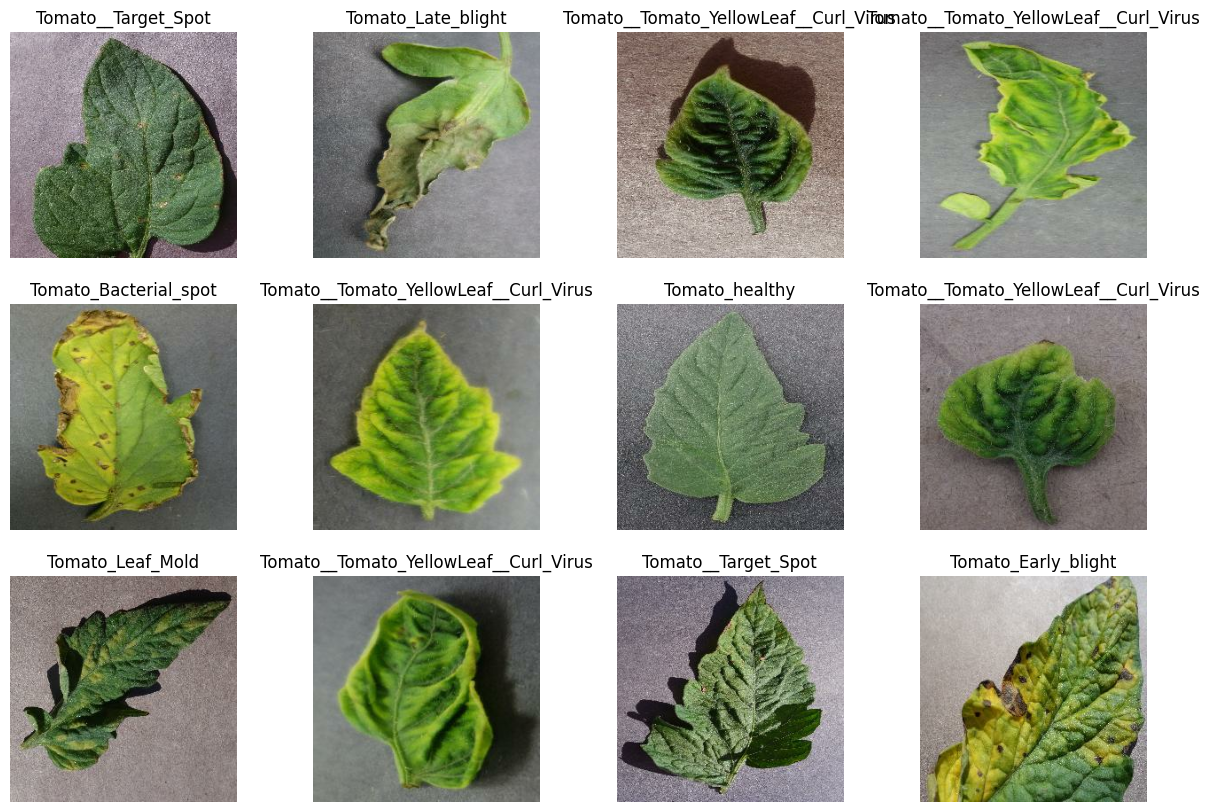

In [77]:
plt.figure(figsize = (15,10))
for image_batch, label_batch in dataset.take(1):
    for i in range (12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label_batch[i]])
    print(image_batch[0].shape)

In [50]:
def get_dataset_partition_tf(ds, train_split = 0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size =  len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.take(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [51]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [55]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

400
50
51


In [56]:
train_ds = train_ds.shuffle(1000).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.shuffle(1000).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.shuffle(1000).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [90]:
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [62]:
print("Dataset classes:", dataset.class_names) 
# Should show your 10 tomato classes
len(dataset.class_names)

Dataset classes: ['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


10

In [63]:
from tensorflow.keras import layers, models

input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)  # Ensure correct input shape
n_classes = 10

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')  # Ensure output matches class count
])

# Display model architecture
model.summary()

C:\ProgramData\miniforge3\envs\tf\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,202 (719.54 KB)

 Trainable params: 184,202 (719.54 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [69]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data= val_ds
    )

Epoch 1/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 128s 296ms/step - accuracy: 0.3410 - loss: 3.0074 - val_accuracy: 0.7437 - val_loss: 0.7430
Epoch 2/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 110s 275ms/step - accuracy: 0.7321 - loss: 0.7948 - val_accuracy: 0.8012 - val_loss: 0.5815
Epoch 3/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 111s 278ms/step - accuracy: 0.8087 - loss: 0.5786 - val_accuracy: 0.8687 - val_loss: 0.3812
Epoch 4/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 114s 285ms/step - accuracy: 0.8406 - loss: 0.4727 - val_accuracy: 0.8731 - val_loss: 0.3843
Epoch 5/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 112s 280ms/step - accuracy: 0.8685 - loss: 0.3923 - val_accuracy: 0.8756 - val_loss: 0.3579
Epoch 6/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 111s 277ms/step - accuracy: 0.8865 - loss: 0.3447 - val_accuracy: 0.8681 - val_loss: 0.4025
Epoch 7/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 112s 279ms/step - accuracy: 0.8944 - loss: 0.3105 - val_accuracy: 0.9050 - val_loss: 0.2947
Epoch 8/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 111s 277ms/step - accuracy: 0.9170 -

In [71]:
scores = model.evaluate(test_ds)
scores

51/51 ━━━━━━━━━━━━━━━━━━━━ 39s 67ms/step - accuracy: 0.9754 - loss: 0.1058


[0.08888082951307297, 0.9785539507865906]

In [72]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [73]:
acc = history.history['accuracy']
val_Acc = history.history['val_accuracy']

loss = history.history["loss"]
val_loss = history.history['val_loss']


In [82]:
plt.figure(figsize=(8,6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_Acc, label='Validation Accuracy')
plt.legend(loc="lower right")
plt.title("Training and validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
Actual label: Tomato__Target_Spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
predicted label: Tomato__Target_Spot


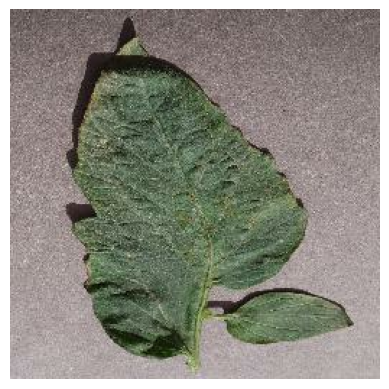

In [81]:
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.axis('off')
    plt.imshow(first_image)
    print("Actual label:", class_names[first_label])
    
    batch_images = model.predict(images_batch)
    print('predicted label:', class_names[np.argmax(batch_images[0])])

In [86]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2 )
    return predicted_class, confidence

In [95]:
def preprocess_image(image):
    image = tf.image.resize(image, [256, 256])
    image = image/255.0  # Same normalization as training
    return image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


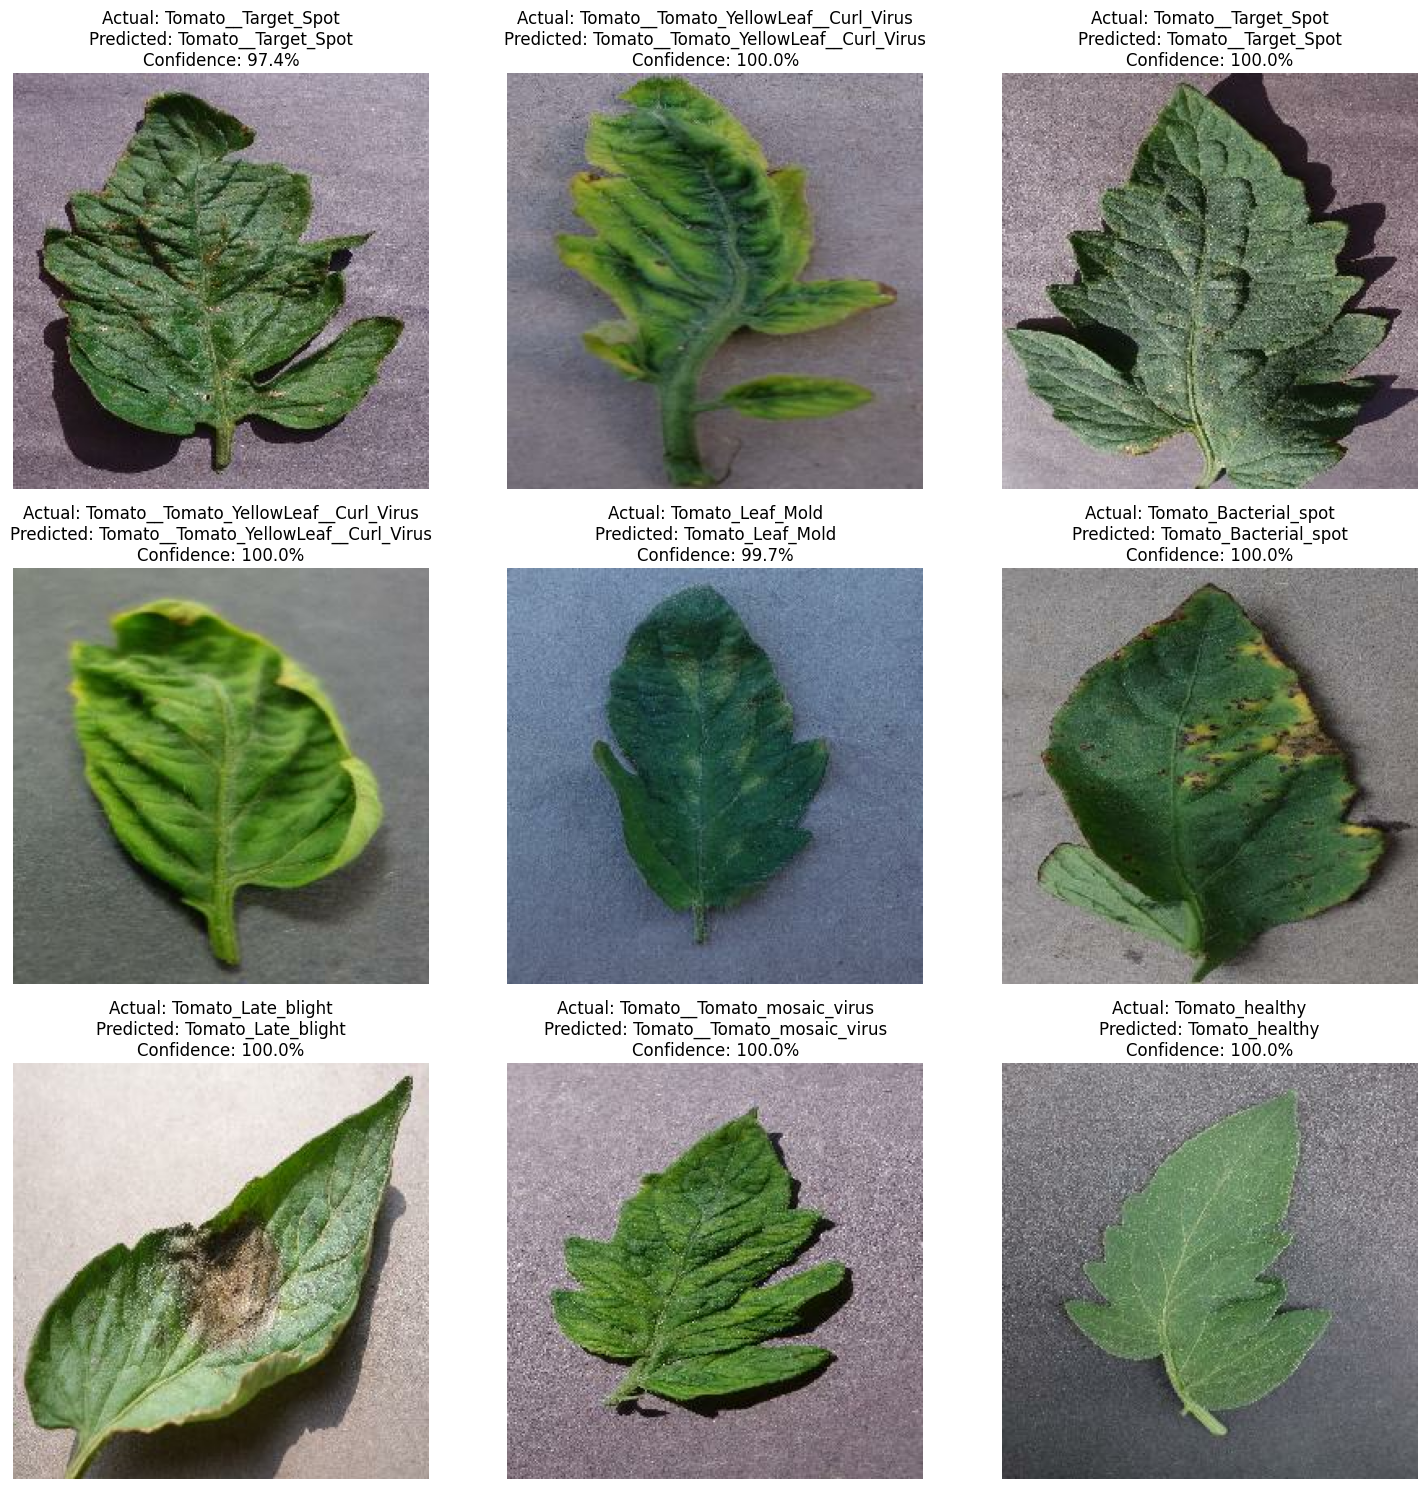

In [107]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(10,19):
        ax = plt.subplot(3, 3, i-9)
        img = images[i].numpy().astype("uint8")
        plt.imshow(img)
        
        # Preprocess exactly like training
        processed_img = preprocess_image(images[i])
        predictions = model.predict(tf.expand_dims(img, axis=0))
        
        predicted_class = class_names[np.argmax(predictions)]
        actual_class = class_names[labels[i]]
        confidence = np.max(predictions)*100
        
        # Highlight incorrect predictions in red
        color = 'red' if predicted_class != actual_class else 'black'
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.1f}%", 
                 color=color)
        plt.axis('off')
plt.tight_layout()

In [108]:
model.save('tomato_disease_model.keras') 

In [110]:
import os

model_version = 2 # Your model version number

# Create models directory if it doesn't exist
os.makedirs("../models", exist_ok=True)

# Save the model in .keras format (recommended)
model.save(f"../models/tomato_disease_v{model_version}.keras")

# Alternative: Save in SavedModel format (for TensorFlow Serving)
# model.save(f"../models/tomato_disease_v{model_version}", save_format="tf")

In [116]:
import os

models_dir = "../models"
os.makedirs(models_dir, exist_ok=True)

# Check if any models exist
existing_models = [f for f in os.listdir(models_dir) 
                  if f.startswith('tomato_disease_v') and f.endswith('.keras')]

if not existing_models:
    model_version = 1
else:
    # Extract highest version number
    model_version = max([int(f.split('v')[1].split('.')[0]) for f in existing_models]) + 1

model.save(f"{models_dir}/tomato_disease_v{model_version}.keras")